In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [93]:
df = pd.read_csv('Final Data');
#Normalize data
scaledData = preprocessing.MinMaxScaler().fit_transform(df.values);
df = pd.DataFrame(scaledData, index = df.index, columns = df.columns);

In [94]:
df = df[['Power Outage','Avg Wind Speed Squared','2 min wind speed squared', '5 second wind speed squared','Fog/Ice' ,'Heavy/Freezing Fog']];
#df = df[['Power Outage','5 second wind speed squared','2 min wind speed squared','Avg Wind Speed Squared','Fog/Ice','Heavy/Freezing Fog', 'Thunder']];
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['Power Outage'], test_size=0.33, random_state = 1234);

Accuracy:  0.933333333333


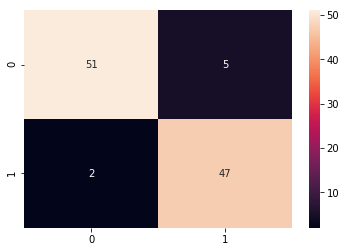

In [95]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, df.iloc[:,1:], df.iloc[:,0]);
clf.fit(X_train, y_train);
pred = clf.predict(X_test);


accuracy = accuracy_score(y_test, pred);

print("Accuracy: ", accuracy);
#print(clf.feature_importances_)
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);

plt.show();

In [96]:
clf = GradientBoostingClassifier(n_estimators = 200, learning_rate=1.0, max_depth=1, random_state=123).fit(X_train, y_train);

pred = clf.predict(X_test);
print(clf.score(X_test, y_test));

0.952380952381


In [97]:
accuracy = accuracy_score(y_test, pred);

print("Accuracy: ", accuracy);
print(clf.feature_importances_)

Accuracy:  0.952380952381
[ 0.195  0.355  0.195  0.195  0.06 ]


Accuracy:  0.952380952381


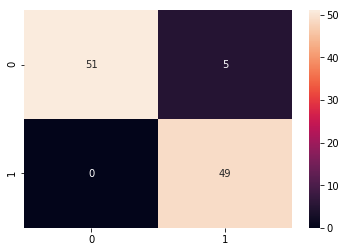

In [98]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);
print("Accuracy: ", accuracy);
plt.show();

In [99]:
#Voting classifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

In [100]:
#X=df[['5 second wind speed squared', 'Fog/Ice','Heavy/Freezing Fog']];
X=df.iloc[:,1:];
y=df['Power Outage'];

In [103]:
clf2 = KNeighborsClassifier(n_neighbors=5)
clf4 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=12345)
clf5 = GradientBoostingClassifier(n_estimators = 200, learning_rate=1, max_depth=1, random_state=123)

eclf = VotingClassifier(estimators=[ ('knn', clf2),('rforest', clf4), ('gboost', clf5)], voting = 'hard');



Accuracy for cross validation run: 
Accuracy: 0.92 (+/- 0.06) [K Nearest Neighbors]
Accuracy: 0.92 (+/- 0.07) [Random Forest]
Accuracy: 0.94 (+/- 0.04) [Gradient Boost]
Accuracy: 0.94 (+/- 0.06) [Ensemble]
Accuracy for test data
Accuracy:  0.952380952381


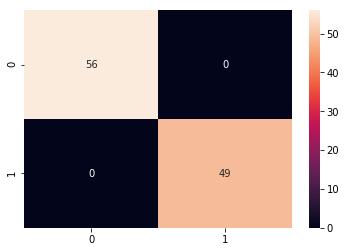

In [104]:
print("Accuracy for cross validation run: ");
for clf, label in zip([clf2, clf4, clf5, eclf], ['K Nearest Neighbors', 'Random Forest', 'Gradient Boost', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), label));
eclf = eclf.fit(X,y);from sklearn.metrics import confusion_matrix
pred = eclf.predict(X_test);
cm = pd.DataFrame(confusion_matrix(y_test, pred));
print("Accuracy for test data");
sns.heatmap(cm, annot=True);
print("Accuracy: ", accuracy);
plt.show();